In [1]:
Create a file “people.txt” with the following data: ied 3

i) Read the data from the file “people.txt”.
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("people.txt")
df

Age agegroup  height   status  yearmarried
0   21    adult     6.0   single           -1
1    2    child     3.0  married            0
2   18    adult     5.7  married           20
3  221  elderly     5.0  widowed            2
4   34    child    -7.0  married            3

In [2]:
df.describe()

Age   height  yearmarried
count    5.000000  5.00000     5.000000
mean    59.200000  2.54000     4.800000
std     91.163041  5.45967     8.642916
min      2.000000 -7.00000    -1.000000
25%     18.000000  3.00000     0.000000
50%     21.000000  5.00000     2.000000
75%     34.000000  5.70000     3.000000
max    221.000000  6.00000    20.000000

ii) Create a ruleset E that contain rules to check for the following conditions: 
1. The age should be in the range 0-150. 
2. The age should be greater than years married. 
3. The status should be married or single or widowed. 
4. If the age is less than 18 the age group should be child, if age is between 18 and 65 the age group should be adult, if age is more than 65 the age group should be elderly.


In [3]:
def ruleset(df):
    df['rule1']=df['Age'].apply(lambda x:True if x>=0 and x<=150 else False)
    df['rule2']=df.apply(lambda x: True if  x.Age> x.yearmarried else False,axis=1)
    df['rule3']=df['status'].apply(lambda x: True if x=='married' or x=='single' or x=='widowed' else False)
    df['rule4']=df.apply(lambda x: True if(( x.Age<18 and x.agegroup=='child') or (x.Age>=18 and x.Age<=65 and x.agegroup=='adult') 
                         or (x.Age>65 and x.agegroup=='elderly')) else False, axis=1)
    

iii) Check whether ruleset E is violated by the data in the file people.txt. 

In [4]:
ruleset(df)
df

Age agegroup  height   status  yearmarried  rule1  rule2  rule3  rule4
0   21    adult     6.0   single           -1   True   True   True   True
1    2    child     3.0  married            0   True   True   True   True
2   18    adult     5.7  married           20   True  False   True   True
3  221  elderly     5.0  widowed            2  False   True   True   True
4   34    child    -7.0  married            3   True   True   True  False

iv) Summarize the results obtained in part (iii) 

In [6]:
df_rule_followed= df.iloc[:,5:]
df_rule_followed= df_rule_followed.astype(int)

df_rule_followed

rule1  rule2  rule3  rule4
0      1      1      1      1
1      1      1      1      1
2      1      0      1      1
3      0      1      1      1
4      1      1      1      0

In [7]:
df_rule_followed.describe()

rule1     rule2  rule3     rule4
count  5.000000  5.000000    5.0  5.000000
mean   0.800000  0.800000    1.0  0.800000
std    0.447214  0.447214    0.0  0.447214
min    0.000000  0.000000    1.0  0.000000
25%    1.000000  1.000000    1.0  1.000000
50%    1.000000  1.000000    1.0  1.000000
75%    1.000000  1.000000    1.0  1.000000
max    1.000000  1.000000    1.0  1.000000

v) Visualize the results obtained in part (iii)


Text(0, 0.5, 'Number of rules violated')

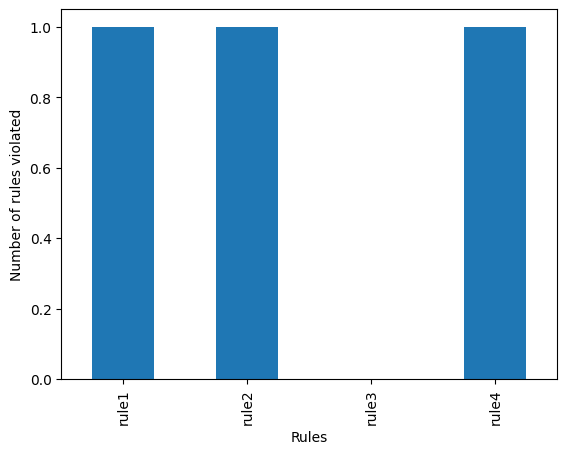

In [8]:
plt.figure()
df_rule_followed.apply(lambda x: len(x)-x.sum()).plot(kind='bar')
plt.xlabel("Rules")
plt.ylabel("Number of rules violated")